In [22]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model,datasets,layers
from tensorflow.keras import models

In [3]:
(train_images,train_labels),(test_images,test_labels)=datasets.cifar10.load_data()

170498071/170498071 [==============================] - 5s 0us/step


In [9]:
train_images,test_images=train_images/255,test_images/255

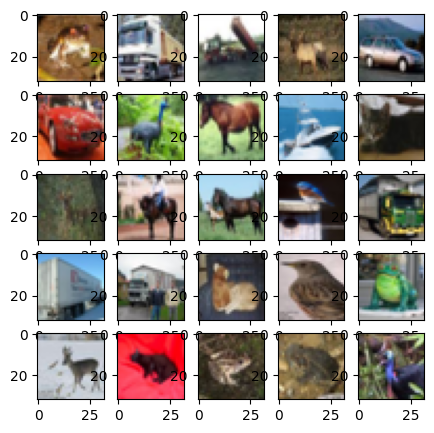

In [21]:
plt.figure(figsize=(5,5))
for i in range (25):
  plt.subplot(5,5,i+1)
  plt.imshow(train_images[i])
plt.show()

In [29]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))


In [30]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

In [33]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

In [34]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

In [35]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [36]:
history=model.fit(train_images,train_labels,epochs=10,validation_data=(test_images,test_labels))

Epoch 1/10
1563/1563 [==============================] - 87s 55ms/step - loss: 1.5725 - accuracy: 0.4227 - val_loss: 1.2834 - val_accuracy: 0.5423
Epoch 2/10
1563/1563 [==============================] - 83s 53ms/step - loss: 1.1968 - accuracy: 0.5751 - val_loss: 1.1524 - val_accuracy: 0.5926
Epoch 3/10
1563/1563 [==============================] - 87s 56ms/step - loss: 1.0285 - accuracy: 0.6382 - val_loss: 1.0615 - val_accuracy: 0.6332
Epoch 4/10
1563/1563 [==============================] - 85s 55ms/step - loss: 0.9312 - accuracy: 0.6753 - val_loss: 0.9276 - val_accuracy: 0.6732
Epoch 5/10
1563/1563 [==============================] - 85s 54ms/step - loss: 0.8529 - accuracy: 0.7026 - val_loss: 0.9296 - val_accuracy: 0.6822
Epoch 6/10
1563/1563 [==============================] - 91s 58ms/step - loss: 0.7938 - accuracy: 0.7223 - val_loss: 0.9057 - val_accuracy: 0.6801
Epoch 7/10
1563/1563 [==============================] - 86s 55ms/step - loss: 0.7449 - accuracy: 0.7397 - val_loss: 0.9088 -

In [37]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 4s - loss: 0.8731 - accuracy: 0.7054 - 4s/epoch - 13ms/step
